# Task 1

In [32]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv('ds-boot-2.csv', sep='\t')
print(data)

     id        p1    p2     p3       p4        p5        p6        p7  \
0    11   6.48148   3.0   5.00  7.75000   0.00000   7.16667   8.16667   
1    12   5.74074   4.0   8.00  7.33333   8.00000   8.83333   9.75000   
2    25   7.59259   7.0   8.00  7.66667   8.00000   9.66667   9.50000   
3    31   5.96297   4.0   8.00  9.33333  10.00000   9.33333   7.00000   
4    48   5.44444   1.0   3.50  6.41667   9.00000   8.50000   7.08333   
5   101   9.62963  10.0   8.00  7.00000   6.66667   9.00000   8.41667   
6   151   0.00000   0.0   0.00  0.00000   0.00000   0.00000   0.00000   
7   155   7.07408   4.0   6.00  5.75000   7.66667   6.33333   5.33333   
8   177   9.25926   0.0   7.50  9.75000   7.00000   9.50000   7.08333   
9   193   0.00000   0.0   0.00  0.00000   0.00000   0.00000   0.00000   
10  210   6.11111  10.0  10.00  9.66667   9.00000   8.00000   7.91667   
11  276   6.48148  10.0   8.50  8.75000   7.00000  10.00000   8.00000   
12  283   6.11111   5.0   8.00  7.00000   6.00000  

In [16]:
def bootstrap_new_samples(samples, B):
    return np.random.choice(samples, (B, len(samples)))


def conf_interval(samples, estimator, B):
    estimations = estimator(samples, axis=1)
    est_mean = estimations.mean()
    interval = np.percentile(estimations, [2.5, 97.5])
    std_error = (((estimations - est_mean) ** 2).sum() / (B - 1)) ** 0.5
    return est_mean, interval, std_error


def print_statistics(sample, B=500):
    bootstrapped = bootstrap_new_samples(sample, B)
    mean_data = conf_interval(bootstrapped, np.mean, B)
    median_data = conf_interval(bootstrapped, np.median, B)
    print("mean: ", mean_data[0], " confidence interval: ", mean_data[1], " error: ", mean_data[2])
    print("median: ", median_data[0], " confidence interval: ", median_data[1], " error: ", median_data[2])
    
    
target_labels = ['y1', 'y2', 'y3', 'y4', 'y5']
for target_label in target_labels:
    print("label ", target_label)
    sample = data[target_label]
    print_statistics(sample, 100)
    print()

label  y1
mean:  4.056125  confidence interval:  [ 3.2475     4.6828125]  error:  0.429695889496
median:  4.1225  confidence interval:  [ 3.5  6. ]  error:  0.509375484136

label  y2
mean:  5.5331875  confidence interval:  [ 4.58171875  6.3009375 ]  error:  0.499381479016
median:  6.23125  confidence interval:  [ 5.        7.190625]  error:  0.604166666667

label  y3
mean:  7.37691  confidence interval:  [ 6.73436875  7.99578125]  error:  0.374548001199
median:  8.3112  confidence interval:  [ 8.042375  8.88675 ]  error:  0.255960382035

label  y4
mean:  1.53317  confidence interval:  [ 1.3677625  1.7038   ]  error:  0.10040991666
median:  1.8659  confidence interval:  [ 1.64  2.  ]  error:  0.130450617616

label  y5
mean:  5.5876025  confidence interval:  [ 4.79505625  6.42543125]  error:  0.466180333836
median:  6.11725  confidence interval:  [ 5.217375  6.745   ]  error:  0.417909887706



In [25]:
def get_coefficients(X, Y):
    reg_model = lm.LinearRegression()
    reg_model.fit(X, Y)
    return reg_model.coef_

def get_bootstrap_coefficients(X, Y, B):
    n = X.shape[0]
    coefficients = []
    for b in range(B):
        reg_model = lm.LinearRegression()
        index = np.random.randint(n, size=n)
        reg_model.fit(X.as_matrix()[index, :], Y.as_matrix()[index])
        coefficients.append(np.append(reg_model.coef_, reg_model.intercept_))
    coefficients = np.array(coefficients)
    interval = np.percentile(coefficients, [2.5, 97.5], axis=0)
    return coefficients.mean(axis=0), interval

features_labels = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
for target_label in target_labels:
    print("label ", target_label)
    reg_model = lm.LinearRegression()
    X, Y = data[features_labels], data[target_label]
    coefficients = get_coefficients(X, Y)
    bootstrap_coefficients, intervals = get_bootstrap_coefficients(X, Y, 500)
    print("coefficients", coefficients)
    print("bootstrap coefficients", bootstrap_coefficients[:-1], '\n',
          'lower bound', intervals[0][:-1], '\n',
          'upper bound', intervals[1][:-1], '\n')
    print()

label  y1
coefficients [ 0.19590832  0.29677494 -0.18401943  0.02210887  0.13189801  0.28986106]
bootstrap coefficients [ 0.21408725  0.28942526 -0.10599206  0.08445931  0.08903233  0.19204165] 
 lower bound [-0.1272416   0.02358972 -0.59356725 -0.35986603 -0.510788   -0.60504288] 
 upper bound [ 0.62213675  0.59419008  0.46023513  0.71408048  0.47157191  0.61888381] 


label  y2
coefficients [ 0.12744323  0.18071353  0.03383592  0.10825791 -0.05377676  0.57520423]
bootstrap coefficients [ 0.1460991   0.17239044  0.11122404  0.16489371 -0.04114797  0.4211343 ] 
 lower bound [-0.29705864 -0.19123849 -0.5379038  -0.30594165 -0.48501762 -0.4691868 ] 
 upper bound [ 0.69765451  0.53265526  0.8679591   0.67262     0.30641247  0.86809777] 


label  y3
coefficients [ 0.15867643  0.01838332  0.12772208  0.29122447  0.17922699  0.23654851]
bootstrap coefficients [ 0.1397446   0.02111329  0.11447728  0.29304058  0.19592119  0.24719736] 
 lower bound [-0.01262962 -0.11662674 -0.1014843   0.065373

# Task 2

In [30]:
data = pd.read_csv('ds-boot-1.csv', sep='\t')
print(data)

       day  bugsPerDay  cummBugs
0        1           0         0
1        2           1         1
2        3           0         1
3        4           2         3
4        5           1         4
5        6           0         4
6        7           0         4
7        8           0         4
8        9           0         4
9       10           0         4
10      11           0         4
11      12           0         4
12      13           3         7
13      14           1         8
14      15           2        10
15      16           0        10
16      17           0        10
17      18           0        10
18      19           0        10
19      20           0        10
20      21           0        10
21      22           2        12
22      23           0        12
23      24           0        12
24      25           0        12
25      26           0        12
26      27           0        12
27      28           1        13
28      29           0        13
29      30

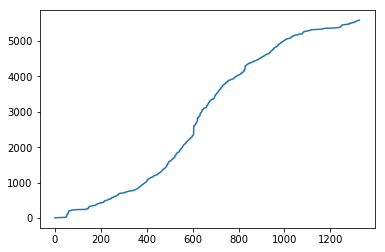

In [33]:
plt.plot(data['cummBugs'])

In [34]:
def s_shape_g_o(a, b, t):
    return a*(1. - (1 + b*t) * np.exp(-b*t))


def s_shape_g_o_mle(x, y, t):
    return np.sum((y - s_shape_go(x[0], x[1], t)) ** 2)


def s_shape_gompertz(a, b, c, t):
    return a * (b ** (c ** t))


def s_shape_gompertz_mle(x, y, t):
    return np.sum((y - s_shape_gompertz(x[0], x[1], x[2], t)) ** 2)


def s_shape_raleigh(a, r, alpha, beta, t):
    return a * (1. - np.exp(-r * alpha * (1 - np.exp((-beta * t ** 2) / 2.))))


def s_shape_raleigh_mle(x, y, t):
    return np.sum((y - s_shape_raleigh(x[0], x[1], x[2], x[3], t)) ** 2)